Step1: 

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SN_m_tot_V2.0.csv', delimiter=';', header=None, names=['time', 'sunspots', 'std', 'obs', 'def'])

# Function to convert fractional year to datetime (monthly granularity)
def fractional_year_to_date(year):
    """
    Converts fractional years (e.g., 1749.042) into a datetime object.
    Args:
        year (float): The year in fractional format.
    Returns:
        datetime: A datetime object corresponding to the fractional year.
    """
    year_int = int(year)  # Extract the integer part of the year
    fraction = year - year_int  # Extract the fractional part
    month = int(fraction * 12) + 1  # Convert fraction to a month (1-based index)
    return datetime(year_int, month, 1)

# Convert fractional year to datetime
df['ds'] = df['time'].apply(fractional_year_to_date)
df['y'] = df['sunspots']

# Keep only necessary columns for Prophet
df = df[['ds', 'y']]

# Check the processed dataframe
print(df.head())

# Time unit detection for monthly data
time_unit = 'month'
future_periods = [1, 6, 9]
print(f"\n Detected time unit: {time_unit}")




               ds      y
1749 1 1749-01-01   96.7
     2 1749-02-01  104.3
     3 1749-03-01  116.7
     4 1749-04-01   92.8
     5 1749-05-01  141.7

 Detected time unit: month


Step 2:


Forecasting for 1 months into the future:


23:48:26 - cmdstanpy - INFO - Chain [1] start processing
23:48:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Predicted values:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  56.263133  -29.534494  140.422943


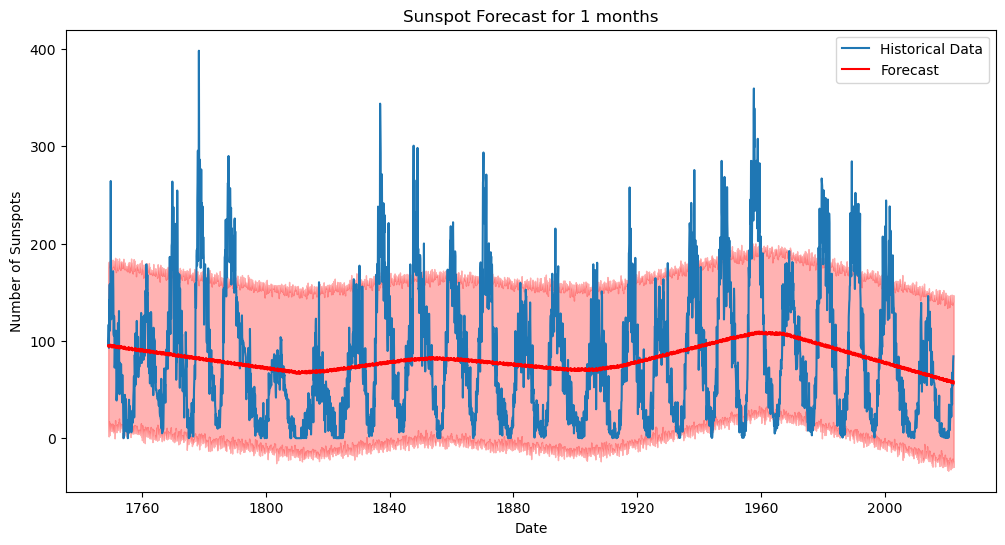


Forecasting for 6 months into the future:


23:48:29 - cmdstanpy - INFO - Chain [1] start processing
23:48:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Predicted values:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  56.263133  -27.319361  139.867873
3281 2022-05-31  58.534180  -26.006699  138.299675
3282 2022-06-30  56.664407  -31.915346  141.344455
3283 2022-07-31  56.517726  -23.586202  140.299364
3284 2022-08-31  57.615437  -28.314246  140.551976
3285 2022-09-30  55.608610  -23.972520  137.125317


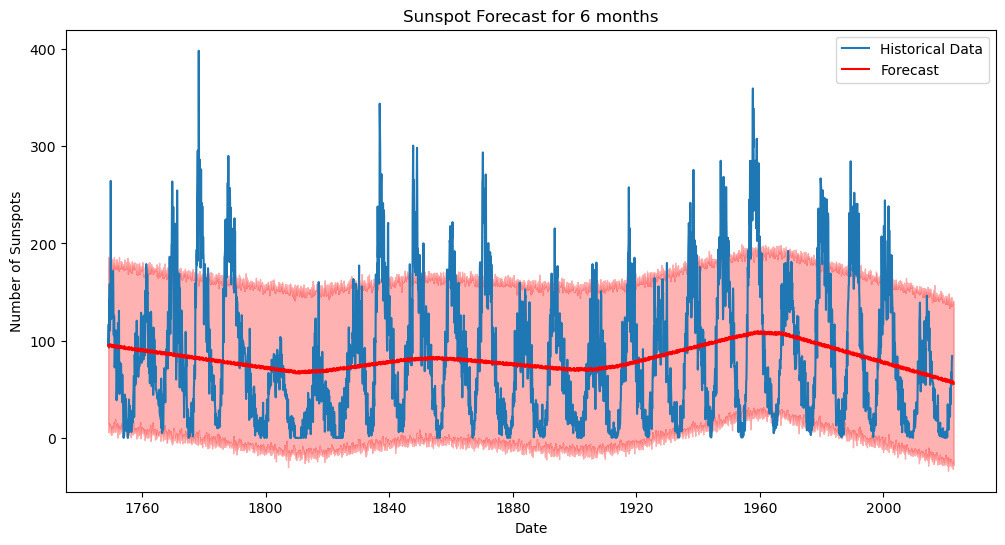


Forecasting for 9 months into the future:


23:48:31 - cmdstanpy - INFO - Chain [1] start processing
23:48:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Predicted values:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  56.263133  -24.994458  139.890035
3281 2022-05-31  58.534180  -19.873487  138.588738
3282 2022-06-30  56.664407  -33.873912  142.847486
3283 2022-07-31  56.517726  -24.635717  144.660109
3284 2022-08-31  57.615437  -25.589240  131.851799
3285 2022-09-30  55.608610  -30.887261  135.377838
3286 2022-10-31  56.167377  -27.347864  142.396808
3287 2022-11-30  57.122968  -30.073022  138.895411
3288 2022-12-31  57.109128  -22.072035  137.541599


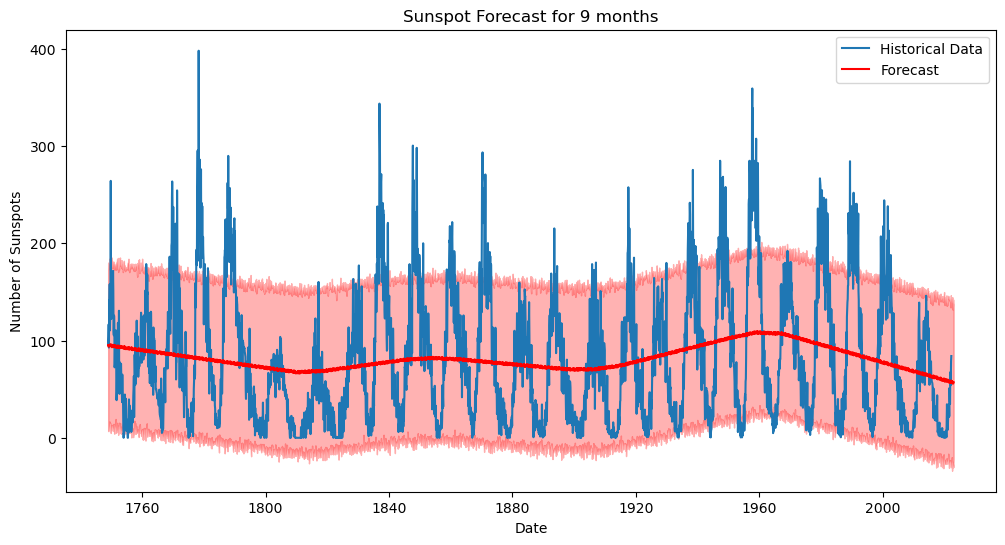

In [5]:
# Function to train and forecast
from prophet import Prophet
import matplotlib.pyplot as plt

def train_and_forecast(df, periods, growth='linear', seasonality_mode='additive'):
    model = Prophet(growth=growth, seasonality_mode=seasonality_mode)
    model.add_seasonality(name='yearly', period=12, fourier_order=5)  # Add monthly seasonality
    model.fit(df)
    future = model.make_future_dataframe(periods=periods, freq='M')  # Monthly frequency
    forecast = model.predict(future)
    return model, forecast

# Train and forecast for different periods
for period in future_periods:
    print(f"\nForecasting for {period} {time_unit}s into the future:")
    
    model, forecast = train_and_forecast(df, period)
    
    # Print predicted values
    print("\nPredicted values:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(period))
    
    # Plot results
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df['ds'], df['y'], label='Historical Data')
    ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.3, color='red')
    ax.set_title(f'Sunspot Forecast for {period} {time_unit}s')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Sunspots')
    ax.legend()
    plt.show()

Step 3: (a)

C:\Users\hp\AppData\Local\Temp\ipykernel_16564\1355576949.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range(start='2000-01-01', periods=100, freq='M'),  # Use 'M' for monthly frequency


Testing monthly_simple...


C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


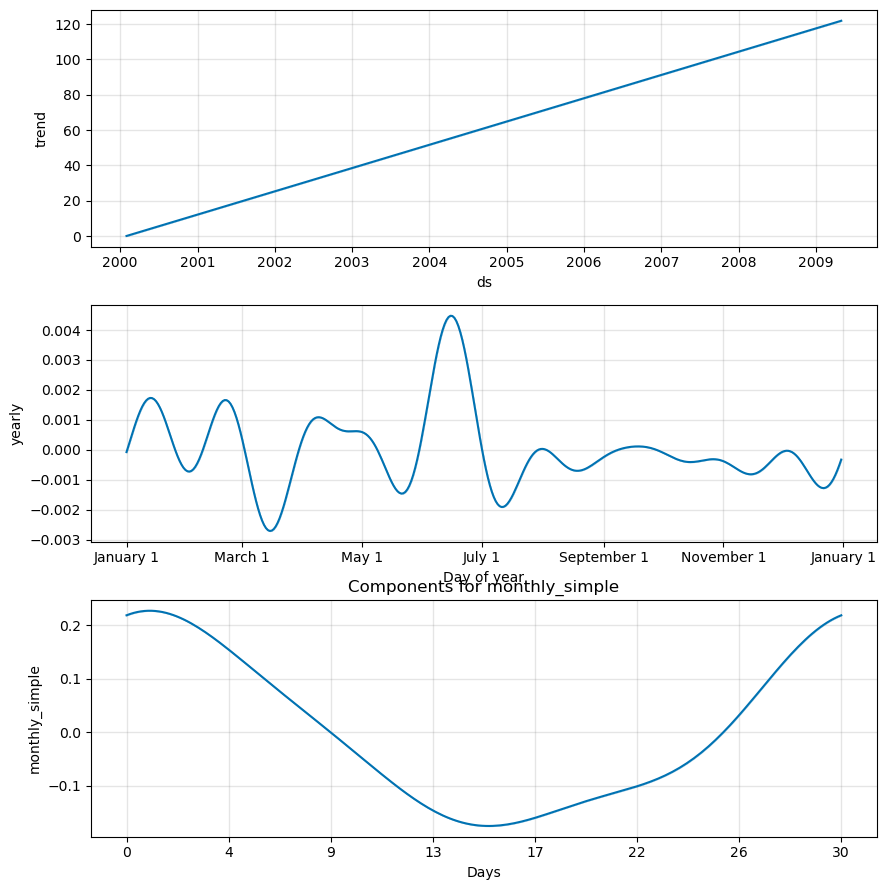

Testing monthly_complex...


C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


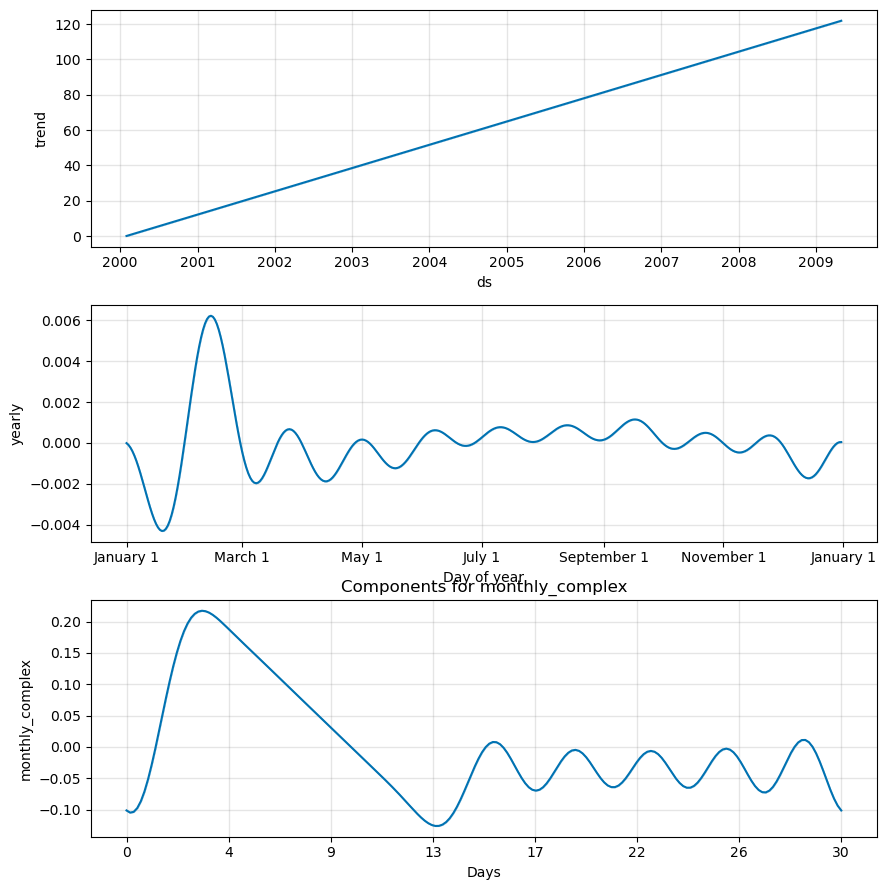

Testing quarterly...


C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


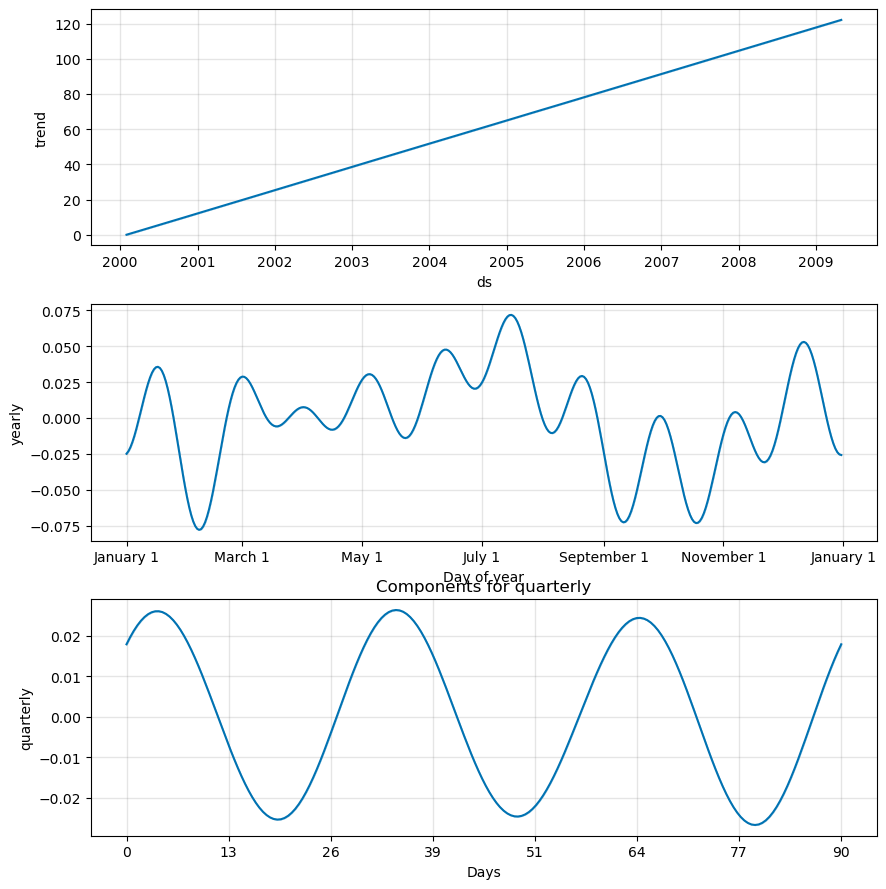

Testing weekly...


C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


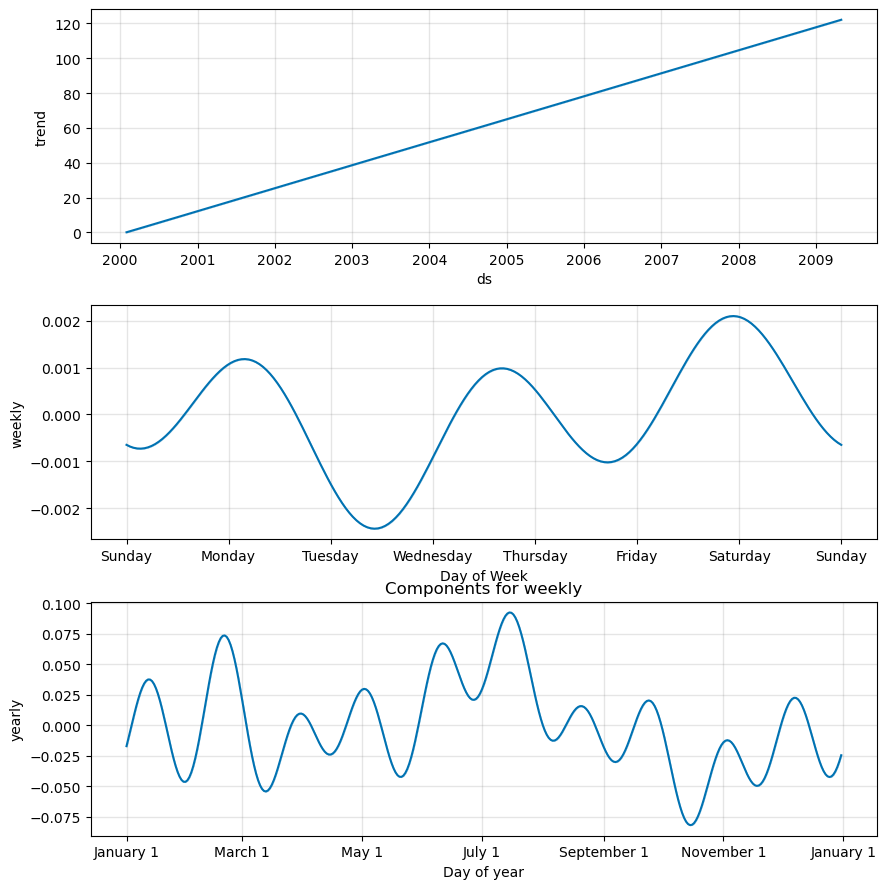

In [10]:
data = pd.DataFrame({
    'ds': pd.date_range(start='2000-01-01', periods=100, freq='M'),  # Use 'M' for monthly frequency
    'y': [i + (i * 0.1) for i in range(100)]  # Simulated linear growth
})

# Test different period and fourier_order combinations
test_cases = [
    {'name': 'monthly_simple', 'period': 30.5, 'fourier_order': 3},  # Approximate 1 month
    {'name': 'monthly_complex', 'period': 30.5, 'fourier_order': 10},  # More complex seasonal pattern
    {'name': 'quarterly', 'period': 90, 'fourier_order': 5},  # Quarterly seasonality
    {'name': 'weekly', 'period': 7, 'fourier_order': 3},  # Weekly seasonality
]

# Loop through each test case
for case in test_cases:
    print(f"Testing {case['name']}...")
    
    # Initialize the model
    model = Prophet()
    
    # Add seasonality with custom period and Fourier order
    model.add_seasonality(name=case['name'], period=case['period'], fourier_order=case['fourier_order'])
    
    # Fit the model to the data
    model.fit(data)
    
    # Make future predictions for 12 months (365 days as a rough equivalent for monthly data)
    future = model.make_future_dataframe(periods=12, freq='M')  # Monthly forecast for 12 months
    forecast = model.predict(future)
    
    # Plot the components of the forecast (seasonal components)
    model.plot_components(forecast)
    plt.title(f"Components for {case['name']}")
    plt.show()


(b)

In [11]:
# Load the monthly dataset 
monthly_data = pd.DataFrame({
    'ds': pd.date_range(start='2020-01-01', periods=100, freq='M'),  # Monthly frequency
    'y': [10 + 0.5 * i + np.sin(2 * np.pi * i / 12) for i in range(100)]  # Simulated monthly data
})

# Split into train/test sets (train for 88 months, test for the last 12 months)
train = monthly_data.iloc[:-12]
test = monthly_data.iloc[-12:]

# Define test cases with different changepoint and seasonality settings
test_cases = [
    {'n_changepoints': 5, 'changepoint_prior_scale': 0.01, 'seasonality': 'monthly'},
    {'n_changepoints': 10, 'changepoint_prior_scale': 0.1, 'seasonality': 'monthly'},
    {'n_changepoints': 25, 'changepoint_prior_scale': 0.5, 'seasonality': 'yearly'},
]

results = []

for case in test_cases:
    model = Prophet(
        n_changepoints=case['n_changepoints'],
        changepoint_prior_scale=case['changepoint_prior_scale']
    )
    
    # Add custom seasonality if applicable
    if case['seasonality'] == 'monthly':
        model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    elif case['seasonality'] == 'yearly':
        model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    
    # Train the model
    model.fit(train)
    
    # Make predictions for 12 months ahead
    future = model.make_future_dataframe(periods=12, freq='M')  # Monthly forecasting
    forecast = model.predict(future)
    
    # Extract predictions for evaluation
    predicted = forecast.iloc[-12:]['yhat']  # Forecast for the next 12 months
    actual = test['y']
    
    # Calculate metrics
    mae = mean_absolute_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    # Store results
    results.append({
        'n_changepoints': case['n_changepoints'],
        'changepoint_prior_scale': case['changepoint_prior_scale'],
        'seasonality': case['seasonality'],
        'MAE': mae,
        'MAPE': mape,
        'R²': r2
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


C:\Users\hp\AppData\Local\Temp\ipykernel_16564\2141370740.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range(start='2020-01-01', periods=100, freq='M'),  # Monthly frequency
C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


   n_changepoints  changepoint_prior_scale seasonality       MAE      MAPE  \
0               5                     0.01     monthly  0.006585  0.000116   
1              10                     0.10     monthly  0.008912  0.000154   
2              25                     0.50      yearly  0.010576  0.000182   

         R²  
0  0.999987  
1  0.999971  
2  0.999952  


C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
Step 4:

In [12]:
monthly_data = pd.DataFrame({
    'ds': pd.date_range(start='2020-01-01', periods=100, freq='M'),  # Monthly frequency
    'y': [10 + 0.5 * i + np.sin(2 * np.pi * i / 12) for i in range(100)]  # Simulated monthly data
})

# Split into train/test sets (train for 80 months, test for the last 12 months)
train = monthly_data.iloc[:-12]
test = monthly_data.iloc[-12:]

# Train a Prophet model
model = Prophet()
model.fit(train)

# Make future predictions (forecasting for the next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')  # Monthly forecasting
forecast = model.predict(future)

# Extract predicted values for the test set
predicted = forecast.iloc[-12:]['yhat']
actual = test['y']

# Evaluate using MAE, MAPE, and R2
mae = mean_absolute_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)
r2 = r2_score(actual, predicted)

# Output the evaluation results
print(f"Model Evaluation for Monthly Forecasting:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"R²: {r2:.2f}")


C:\Users\hp\AppData\Local\Temp\ipykernel_16564\2759864800.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range(start='2020-01-01', periods=100, freq='M'),  # Monthly frequency


Model Evaluation for Monthly Forecasting:
MAE: 0.01
MAPE: 0.02%
R²: 1.00


C:\Users\hp\anaconda3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
